In [2]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
DIR_EXERCISE = "../../data/exercises_pictures/"

subfolders = os.listdir(DIR_EXERCISE)

# for each subfolder get the list of all their file names
filenames = {
    subfolder: os.listdir(os.path.join(DIR_EXERCISE, subfolder)) 
    for subfolder in subfolders}
all_filenames = [
    [{"filename": filename, "folder": key} for filename in filenames[key]]
    for key in filenames.keys()]
# flatten the list of lists
all_filenames = [item for sublist in all_filenames for item in sublist]

all_filenames[:3]

[{'filename': '1682501488.2318697.png', 'folder': 'is_shoulder_down'},
 {'filename': '1682500259.938887.png', 'folder': 'is_shoulder_down'},
 {'filename': '1682601701.3909159.png', 'folder': 'is_shoulder_down'}]

In [7]:
df = pd.DataFrame.from_dict(all_filenames)
df.rename(columns={"folder": "exercise"}, inplace=True)
# get the filestem as time
df['time'] = df['filename'].apply(lambda x: int(x.split(".")[0]))
# convert time in date and group by date day
df['date'] = pd.to_datetime(df['time'], unit='s').dt.date
df['date'] = pd.to_datetime(df['date'])
df_grouped = df.groupby(['date', 'exercise']).count().reset_index()

df_grouped.head()

,date,exercise,filename,time
0,2023-04-26,both_elbow_up,66,66
1,2023-04-26,is_shoulder_down,150,150
2,2023-04-26,overlap_hands,28,28
3,2023-04-27,both_elbow_up,78,78
4,2023-04-27,is_shoulder_down,183,183


<Axes: xlabel='date', ylabel='count'>

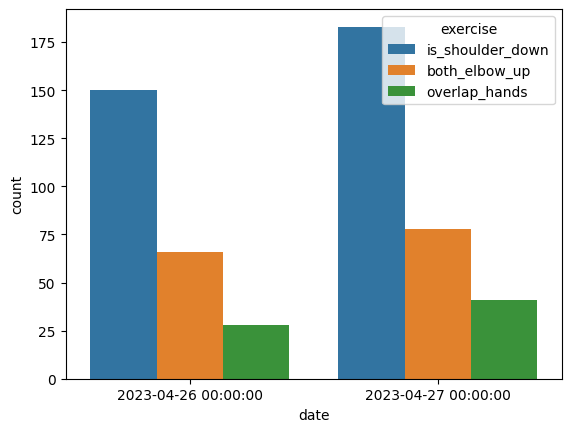

In [8]:
# create histogram
sns.countplot(
    data=df,
    x="date",
    hue="exercise",
)